In [43]:
import numpy as np
import pandas as pd

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns 


In [45]:
df = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002280BD93B38>,
      dtype=object)

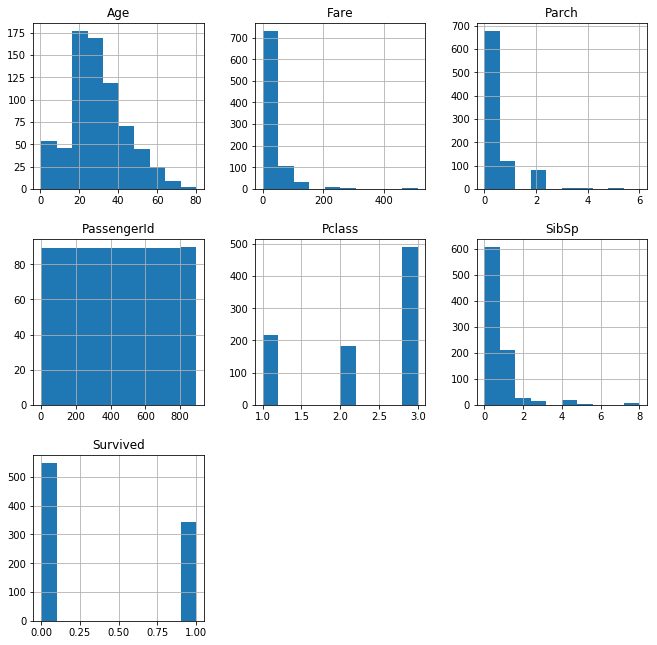

In [46]:
df.hist(figsize = (11,11))

In [47]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [49]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [50]:
df['Age'] = df['Age'].fillna(df['Age'].mean())
df_test['Age'] = df_test['Age'].fillna(df_test['Age'].mean())

In [51]:
x = df.drop(['PassengerId','Name','Ticket','Cabin'],axis = 1)
x_test = df_test.drop(['PassengerId','Name','Ticket','Cabin'],axis = 1)

In [52]:
x = x.dropna()
x_test = x_test.dropna()
y = x.loc[:,'Survived']
x = x.drop('Survived',axis = 1)

In [53]:
x

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.000000,1,0,7.2500,S
1,1,female,38.000000,1,0,71.2833,C
2,3,female,26.000000,0,0,7.9250,S
3,1,female,35.000000,1,0,53.1000,S
4,3,male,35.000000,0,0,8.0500,S
5,3,male,29.699118,0,0,8.4583,Q
6,1,male,54.000000,0,0,51.8625,S
7,3,male,2.000000,3,1,21.0750,S
8,3,female,27.000000,0,2,11.1333,S
9,2,female,14.000000,1,0,30.0708,C


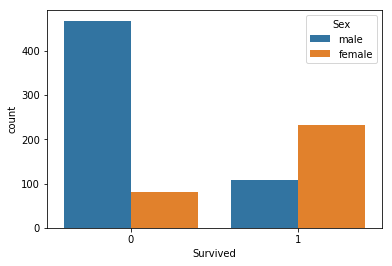

In [54]:
sns.countplot(x = 'Survived',hue = 'Sex',data = df)
# this shows that female count of survival is more than the male , and the no. of male death is more than the female .

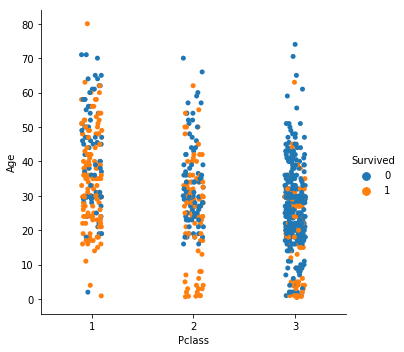

In [55]:
sns.catplot(x= 'Pclass',y = 'Age',hue = 'Survived',data = df)

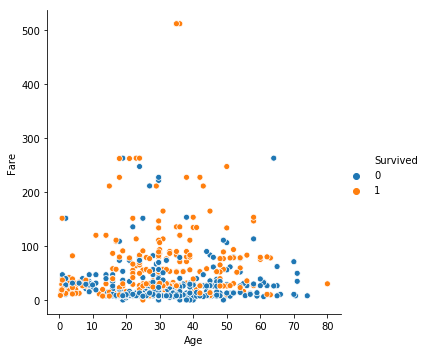

In [56]:
sns.relplot(x= 'Age',y = 'Fare',hue = 'Survived',data = df)

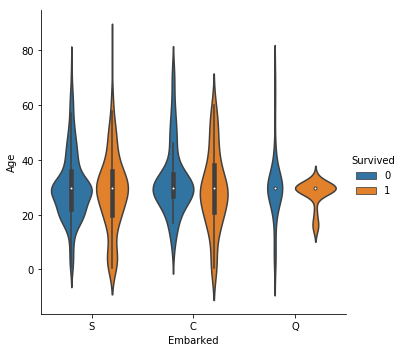

In [57]:
sns.catplot(x = 'Embarked', y = 'Age',hue = 'Survived',kind = 'violin',data = df)

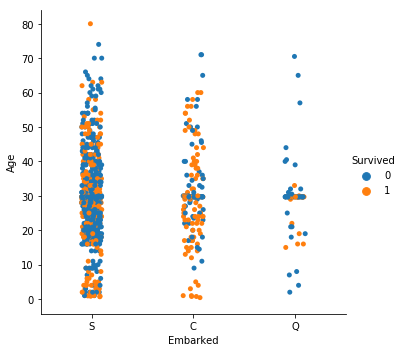

In [58]:
sns.catplot(x = 'Embarked' , y = 'Age',hue = 'Survived',data = df)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002280E2B87F0>,
      dtype=object)

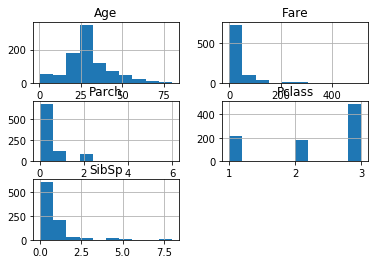

In [59]:
x.hist()

In [60]:
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()
x[['Age','Fare','Parch','SibSp']] = minmax.fit_transform(x[['Age','Fare','Parch','SibSp']])
x_test[['Age','Fare','Parch','SibSp']] = minmax.fit_transform(x_test[['Age','Fare','Parch','SibSp']])

In [61]:
x

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,0.271174,0.125,0.000000,0.014151,S
1,1,female,0.472229,0.125,0.000000,0.139136,C
2,3,female,0.321438,0.000,0.000000,0.015469,S
3,1,female,0.434531,0.125,0.000000,0.103644,S
4,3,male,0.434531,0.000,0.000000,0.015713,S
5,3,male,0.367921,0.000,0.000000,0.016510,Q
6,1,male,0.673285,0.000,0.000000,0.101229,S
7,3,male,0.019854,0.375,0.166667,0.041136,S
8,3,female,0.334004,0.000,0.333333,0.021731,S
9,2,female,0.170646,0.125,0.000000,0.058694,C


In [62]:
x_test.head(10)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,0.452723,0.000,0.000000,0.015282,Q
1,3,female,0.617566,0.125,0.000000,0.013663,S
2,2,male,0.815377,0.000,0.000000,0.018909,Q
3,3,male,0.353818,0.000,0.000000,0.016908,S
4,3,female,0.287881,0.125,0.111111,0.023984,S
5,3,male,0.182382,0.000,0.000000,0.018006,S
6,3,female,0.393380,0.000,0.000000,0.014891,Q
7,2,male,0.340630,0.125,0.111111,0.056604,S
8,3,female,0.235131,0.000,0.000000,0.014110,C
9,3,male,0.274693,0.250,0.000000,0.047138,S


In [63]:
x = x.values
x_test = x_test.values
y = y.values

In [64]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
x[:,1] =  le.fit_transform(x[:,1])
x_test[:,1] =  le.fit_transform(x_test[:,1])
x[:,6] = le.fit_transform(x[:,6])
x_test[:,6] = le.fit_transform(x_test[:,6])

In [65]:
x

array([[3, 1, 0.2711736617240512, 0.125, 0.0, 0.014151057562208049, 2],
       [1, 0, 0.4722292033174164, 0.125, 0.0, 0.13913573538264068, 0],
       [3, 0, 0.32143754712239253, 0.0, 0.0, 0.015468569817999833, 2],
       [1, 0, 0.4345312892686604, 0.125, 0.0, 0.10364429745562033, 2],
       [3, 1, 0.4345312892686604, 0.0, 0.0, 0.015712553569072387, 2],
       [3, 1, 0.36792055349407915, 0.0, 0.0, 0.01650950209357577, 1],
       [1, 1, 0.6732847449107816, 0.0, 0.0, 0.10122885832000206, 2],
       [3, 1, 0.01985423473234481, 0.375, 0.16666666666666666,
        0.04113566043083236, 2],
       [3, 0, 0.33400351847197784, 0.0, 0.3333333333333333,
        0.021730754366528396, 2],
       [2, 0, 0.17064589092736868, 0.125, 0.0, 0.058694292654020104, 0],
       [3, 0, 0.04498617743151546, 0.125, 0.16666666666666666,
        0.03259622914329302, 2],
       [1, 0, 0.723548630309123, 0.0, 0.0, 0.051822148727810165, 2],
       [3, 1, 0.24604171902488062, 0.0, 0.0, 0.015712553569072387, 2],
       

In [66]:
x_test

array([[3, 1, 0.45272319662402744, 0.0, 0.0, 0.015281580671177828, 1],
       [3, 0, 0.6175656072794409, 0.125, 0.0, 0.013663090060062943, 2],
       [2, 1, 0.815376500065937, 0.0, 0.0, 0.018908740708122825, 1],
       [3, 1, 0.3538177502307794, 0.0, 0.0, 0.016908073949327893, 2],
       [3, 0, 0.287880785968614, 0.125, 0.1111111111111111,
        0.023983602730431916, 2],
       [3, 1, 0.18238164314914942, 0.0, 0.0, 0.01800600082915438, 2],
       [3, 0, 0.3933799287880786, 0.0, 0.0, 0.014891206669461744, 1],
       [2, 1, 0.34063035737834635, 0.125, 0.1111111111111111,
        0.056604230248832196, 2],
       [3, 0, 0.23513121455888172, 0.0, 0.0, 0.014110458666029575, 0],
       [3, 1, 0.27469339311618096, 0.25, 0.0, 0.04713766070721715, 2],
       [3, 1, 0.39697468497225086, 0.0, 0.0, 0.015411575213749286, 2],
       [1, 1, 0.6043782144270078, 0.0, 0.0, 0.050748620223090936, 2],
       [1, 0, 0.3010681788210471, 0.125, 0.0, 0.16057390443488287, 2],
       [2, 1, 0.8285638929183701, 

In [67]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(categorical_features = [0])
x = ohe.fit_transform(x).toarray()

In [68]:
x = x[:,1:]

In [69]:
x

array([[0.        , 1.        , 1.        , 0.27117366, 0.125     ,
        0.        , 0.01415106, 2.        ],
       [0.        , 0.        , 0.        , 0.4722292 , 0.125     ,
        0.        , 0.13913574, 0.        ],
       [0.        , 1.        , 0.        , 0.32143755, 0.        ,
        0.        , 0.01546857, 2.        ],
       [0.        , 0.        , 0.        , 0.43453129, 0.125     ,
        0.        , 0.1036443 , 2.        ],
       [0.        , 1.        , 1.        , 0.43453129, 0.        ,
        0.        , 0.01571255, 2.        ],
       [0.        , 1.        , 1.        , 0.36792055, 0.        ,
        0.        , 0.0165095 , 1.        ],
       [0.        , 0.        , 1.        , 0.67328474, 0.        ,
        0.        , 0.10122886, 2.        ],
       [0.        , 1.        , 1.        , 0.01985423, 0.375     ,
        0.16666667, 0.04113566, 2.        ],
       [0.        , 1.        , 0.        , 0.33400352, 0.        ,
        0.33333333, 0.021730

In [70]:
x_test = ohe.fit_transform(x_test).toarray()

In [71]:
x_test

array([[0.        , 0.        , 1.        , 1.        , 0.4527232 ,
        0.        , 0.        , 0.01528158, 1.        ],
       [0.        , 0.        , 1.        , 0.        , 0.61756561,
        0.125     , 0.        , 0.01366309, 2.        ],
       [0.        , 1.        , 0.        , 1.        , 0.8153765 ,
        0.        , 0.        , 0.01890874, 1.        ],
       [0.        , 0.        , 1.        , 1.        , 0.35381775,
        0.        , 0.        , 0.01690807, 2.        ],
       [0.        , 0.        , 1.        , 0.        , 0.28788079,
        0.125     , 0.11111111, 0.0239836 , 2.        ],
       [0.        , 0.        , 1.        , 1.        , 0.18238164,
        0.        , 0.        , 0.018006  , 2.        ],
       [0.        , 0.        , 1.        , 0.        , 0.39337993,
        0.        , 0.        , 0.01489121, 1.        ],
       [0.        , 1.        , 0.        , 1.        , 0.34063036,
        0.125     , 0.11111111, 0.05660423, 2.        ],


In [72]:
x_test = x_test[:,1:]

In [73]:
x_test

array([[0.        , 1.        , 1.        , 0.4527232 , 0.        ,
        0.        , 0.01528158, 1.        ],
       [0.        , 1.        , 0.        , 0.61756561, 0.125     ,
        0.        , 0.01366309, 2.        ],
       [1.        , 0.        , 1.        , 0.8153765 , 0.        ,
        0.        , 0.01890874, 1.        ],
       [0.        , 1.        , 1.        , 0.35381775, 0.        ,
        0.        , 0.01690807, 2.        ],
       [0.        , 1.        , 0.        , 0.28788079, 0.125     ,
        0.11111111, 0.0239836 , 2.        ],
       [0.        , 1.        , 1.        , 0.18238164, 0.        ,
        0.        , 0.018006  , 2.        ],
       [0.        , 1.        , 0.        , 0.39337993, 0.        ,
        0.        , 0.01489121, 1.        ],
       [1.        , 0.        , 1.        , 0.34063036, 0.125     ,
        0.11111111, 0.05660423, 2.        ],
       [0.        , 1.        , 0.        , 0.23513121, 0.        ,
        0.        , 0.014110

In [74]:
ohe1 = OneHotEncoder(categorical_features = [-1])
x = ohe1.fit_transform(x).toarray()

In [75]:
x = x[:,1:]

In [76]:
x

array([[0.        , 1.        , 0.        , 1.        , 1.        ,
        0.27117366, 0.125     , 0.        , 0.01415106],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.4722292 , 0.125     , 0.        , 0.13913574],
       [0.        , 1.        , 0.        , 1.        , 0.        ,
        0.32143755, 0.        , 0.        , 0.01546857],
       [0.        , 1.        , 0.        , 0.        , 0.        ,
        0.43453129, 0.125     , 0.        , 0.1036443 ],
       [0.        , 1.        , 0.        , 1.        , 1.        ,
        0.43453129, 0.        , 0.        , 0.01571255],
       [1.        , 0.        , 0.        , 1.        , 1.        ,
        0.36792055, 0.        , 0.        , 0.0165095 ],
       [0.        , 1.        , 0.        , 0.        , 1.        ,
        0.67328474, 0.        , 0.        , 0.10122886],
       [0.        , 1.        , 0.        , 1.        , 1.        ,
        0.01985423, 0.375     , 0.16666667, 0.04113566],


In [77]:
x_test = ohe1.fit_transform(x_test).toarray()

In [78]:
x_test = x_test[:,1:]

In [79]:
x_test

array([[1.        , 0.        , 0.        , 1.        , 1.        ,
        0.4527232 , 0.        , 0.        , 0.01528158],
       [0.        , 1.        , 0.        , 1.        , 0.        ,
        0.61756561, 0.125     , 0.        , 0.01366309],
       [1.        , 0.        , 1.        , 0.        , 1.        ,
        0.8153765 , 0.        , 0.        , 0.01890874],
       [0.        , 1.        , 0.        , 1.        , 1.        ,
        0.35381775, 0.        , 0.        , 0.01690807],
       [0.        , 1.        , 0.        , 1.        , 0.        ,
        0.28788079, 0.125     , 0.11111111, 0.0239836 ],
       [0.        , 1.        , 0.        , 1.        , 1.        ,
        0.18238164, 0.        , 0.        , 0.018006  ],
       [1.        , 0.        , 0.        , 1.        , 0.        ,
        0.39337993, 0.        , 0.        , 0.01489121],
       [0.        , 1.        , 1.        , 0.        , 1.        ,
        0.34063036, 0.125     , 0.11111111, 0.05660423],


Now let's do Machine learning work

In [80]:
from sklearn.preprocessing import scale

In [81]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
x_scale = scale(x)
x_test_scale = x_test
log.fit(x_scale,y)
y_pred_scale = log.predict(x_scale)
y_test_scale = log.predict(x_test_scale)


In [82]:
from sklearn.metrics import confusion_matrix ,accuracy_score
confusion_matrix(y,y_pred_scale)

array([[477,  72],
       [102, 238]], dtype=int64)

In [83]:
accuracy_score(y,y_pred_scale)

0.8042744656917885

In [84]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(x,y)
y_pred = svc.predict(x)
y_test = svc.predict(x_test)
accuracy_score(y,y_pred)

0.7896512935883014

In [85]:
accuracy_score(y,y_pred)

0.7896512935883014

In [86]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x,y)
y_pred = knn.predict(x)
y_test = knn.predict(x_test)
accuracy_score(y,y_pred)

0.8537682789651294

In [87]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x,y)
y_pred = dtc.predict(x)
y_test = dtc.predict(x_test)
accuracy_score(y,y_pred)

0.9820022497187851

In [88]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(x,y)
y_pred = rfc.predict(x) 
y_test = rfc.predict(x_test)
accuracy_score(y,y_pred)

0.9640044994375703